# Elliptic PDEs



The classic example of an elliptic PDE is **Laplace's equation** (yep, the same Laplace that gave us the Laplace transform), which in two dimensions for a variable $u(x,y)$ is
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \nabla^2 u = 0 \;,
\end{equation}
where $\nabla$ is del, or nabla, and represents the gradient operator: $\nabla = \frac{\partial}{\partial x} + \frac{\partial}{\partial y}$.

Laplace's equation shows up in a number of physical problems, including heat transfer, fluid dynamics, and electrostatics. For example, the heat equation for conduction in two dimensions is
\begin{equation}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) \;,
\end{equation}
where $u(x,y,t)$ is temperature and $\alpha$ is thermal diffusivity. Steady-state heat transfer (meaning after any initial transient period) is then described by Laplace's equation.

A related elliptic PDE is **Poisson's equation**:
\begin{equation}
\nabla^2 u = f(x,y) \;,
\end{equation}
which also appears in multiple physical problems—most notably, when solving for pressure in the Navier–Stokes equations.

To numerically solve these equations, and any elliptic PDE, we can use finite differences, where we replace the continuous $x,y$ domain with a discrete grid of points. This is similar to what we did with boundary-value problems in one dimension—but now we have two dimensions.

To approximate the second derivatives in Laplace's equation, we can use central differences in both the $x$ and $y$ directions, applied around the $u_{i,j}$ point:
\begin{align}
\frac{\partial^2 u}{\partial x^2} &\approx \frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} \\
\frac{\partial^2 u}{\partial y^2} &\approx \frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{\Delta y^2}
\end{align}
where $i$ is the index used in the $x$ direction, $j$ is the index in the $y$ direction, and $\Delta x$ and $\Delta y$ are the step sizes in the $x$ and $y$ directions.
In other words, $x_i = (i-1) \Delta x$ and $y_j = (j-1) \Delta y$.

The following figure shows the points necessary to approximate the partial derivatives in the PDE at a location $(x_i, y_j)$, for a general 2D region. This is known as a **five-point stencil**:

:::{figure-md} fig-stencil
<img src="../../images/five-point-stencil.png" alt="five-point stencil" class="bg-primary mb-1" width="350px">

Five-point finite difference stencil
:::

Applying these finite differences gives us an approximation for Laplace's equation:
\begin{equation}
\frac{u_{i-1,j} - 2u_{i,j} + u_{i+1,j}}{\Delta x^2} + \frac{u_{i,j-1} - 2u_{i,j} + u_{i,j+1}}{\Delta y^2} = 0 \;.
\end{equation}
If we use a uniform grid where $\Delta x = \Delta y = h$, then we can simplify to 
\begin{equation}
u_{i+1,j} + u_{i,j+1} + u_{i-1,j} + u_{i,j-1} - 4 u_{i,j} = 0 \;.
\end{equation}

## Example: heat transfer in a square plate

As an example, let's consider the problem of steady-state heat transfer in a square solid object. If $u(x,y)$ is temperature, then this is described by Laplace's equation:
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \nabla^2 u = 0 \;,
\end{equation}
and we can solve this using finite differences. Using a uniform grid where $\Delta x = \Delta y = h$, Laplace's equation gives us a recursion formula that relates the values at neighboring points:
\begin{equation}
u_{i+1,j} + u_{i,j+1} + u_{i-1,j} + u_{i,j-1} - 4 u_{i,j} = 0 \;.
\end{equation}

Consider a case where the square has sides of length $L$, and the boundary conditions are that the temperature is fixed at 100 on the left, right, and bottom sides, and fixed at 0 on the top.
For now, we'll use two segments to discretize the domain in each directions, giving us nine total points in the grid.
The following figures show the example problem, and the grid of points we'll use.

:::{figure-md} fig-heat-transfer-square
<img src="../../images/heat-transfer-square.png" alt="Heat transfer in a square" class="bg-primary mb-1" width="250px">

Heat transfer in a square object
:::

:::{figure-md} fig-grid-three
<img src="../../images/heat-equation-grid.png" alt="3x3 grid of points" class="bg-primary mb-1" width="250px">

Simple 3x3 grid of points
:::

Using the above recursion formula, we can write an equation for each of the nine unknown points (in the interior, not the boundary points):
\begin{align}
u_{1,1} &= 100 \\
u_{2,1} &= 100 \\
u_{3,1} &= 100 \\
u_{1,2} &= 100 \\
\text{for } u_{2,2}: \quad u_{3,2} + u_{2,3} + u_{1,2} + u_{2,1} - 4u_{2,2} &= 0 \\
u_{3,2} &= 100 \\
u_{1,3} &= 100 \\
u_{2,3} &= 0 \\
u_{3,3} &= 100
\end{align}
where $u_{i,j}$ are the unknowns. Note that in this we used the side boundary condition values for the corner points $u_{1,3}$ and $u_{3,3}$, rather than the top value. (In reality this would represent a discontinuity in temperature, so these aren't very realistic boundary conditions.)

This is a system of linear equations, that we can represent as a matrix-vector product:
\begin{align}
\begin{bmatrix} 
1 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 &  0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 &  0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 &  0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 &  0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 &  0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 &  0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 &  0 & 0 & 0 & 0 & 1 \\\end{bmatrix}
\begin{bmatrix} u_{1,1} \\ u_{2,1} \\ u_{3,1} \\ u_{1,2} \\ u_{2,2} \\ u_{3,2} \\ u_{1,3} \\ u_{2,3} \\ u_{3,3} \end{bmatrix} &= 
\begin{bmatrix} 100 \\ 100 \\ 100 \\ 
100 \\ 0 \\ 100 \\
100 \\ 0 \\ 100 \end{bmatrix} \\
\text{or} \quad A \mathbf{u} &= \mathbf{b}
\end{align}
where $A$ is a $9\times 9$ coefficient matrix, $\mathbf{u}$ is a nine-element vector of unknown variables, and $\mathbf{b}$ is a nine-element right-hand side vector.
For $\mathbf{u}$, we had to take variables that physically represent points in a two-dimensional space and combine them in some order to form a one-dimensional column vector. Here, we used a **row-major** mapping, where we started with the point in the first row and first column, then added the remaining points in that row, before moving to the next row and repeating. We'll discuss this a bit more later.

If we set this up in Matlab, we can solve with `u = A \ b`:

In [6]:
clear all; clc

A = [
1 0 0 0  0 0 0 0 0;
0 1 0 0  0 0 0 0 0;
0 0 1 0  0 0 0 0 0;
0 0 0 1  0 0 0 0 0;
0 1 0 1 -4 1 0 1 0;
0 0 0 0  0 1 0 0 0;
0 0 0 0  0 0 1 0 0;
0 0 0 0  0 0 0 1 0;
0 0 0 0  0 0 0 0 1];
b = [100; 100; 100; 100; 0; 100; 100; 0; 100];

% solve system of linear equations
u = A \ b;

disp(u)

   100
   100
   100
   100
    75
   100
   100
     0
   100



This gives us the values for temperature at each of the nine points. In this example, we really only have one unknown temperature: $u_{2,2}$, located in the middle. Does the value given make sense? We can check by rearranging the recursion formula for Laplace's equation:
\begin{equation}
u_{i,j} = \frac{u_{i+1,j} + u_{i,j+1} + u_{i-1,j} + u_{i,j-1}}{4} \;,
\end{equation}
which shows that in such problems the value of the middle point should be the average of the four surrounding points. This matches the value of 75 found above.

We can use a contour plot to visualize the results, though we'll need to convert the one-dimensional solution array into a two-dimensional matrix to plot. The Matlab `reshape()` function can help us here: it reshapes an array into a matrix, by specifying the target number of desired columns and rows:

In [14]:
% Example of using the reshape function, with a simple array going from 1 to 10

% We want to convert it into a matrix with 5 columns and 2 rows.
% The expected output is:
% [1 2 3 4 5; 
%  6 7 8 9 10]

b = (1 : 10)';
A = reshape(b, [5, 2]);
disp('b array:')
disp(b)
disp('A matrix:')
disp(A)

b array:
     1
     2
     3
     4
     5
     6
     7
     8
     9
    10

A matrix:
     1     6
     2     7
     3     8
     4     9
     5    10



This behavior may be a bit unexpected, because `reshape()` uses a column-major mapping. We can fix this by taking the transpose of the resulting matrix:

In [15]:
disp('transpose of output matrix:')
disp(A')

transpose of output matrix:
     1     2     3     4     5
     6     7     8     9    10



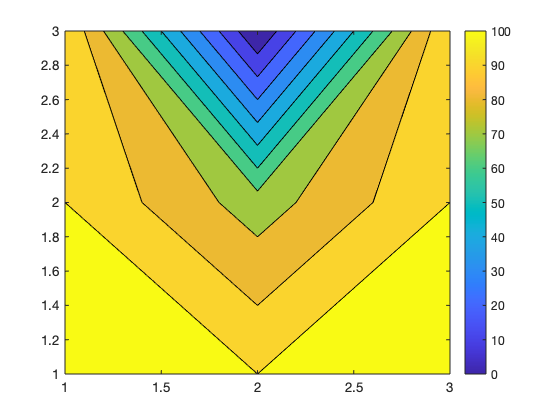

In [16]:
% We can use the reshape function to convert the calculated temperatures
% into a 3x3 matrix:

n = 3; m = 3;
u_square = reshape(u, [n, m]);

contourf(u_square')
colorbar

Overall that looks correct: the boundary conditions are right, and we see that the center is the average of the boundaries.

But, clearly only using nine points (with eight of those being boundary conditions) doesn't give us a very good solution. To make this more accurate, we'll need to use more points, which also means we need to automate the construction of the system of equations.

## Row-major mapping

For a two-dimensional elliptic PDE like Laplace's equation, we can generate a general recursion formula, but we need a way to take a grid of points where location is defined by row and column index and map these into a one-dimensional column vector, which has its own index.

The following figure shows a general 2D grid of points, with $n$ number of columns in the $x$ direction (using index $i$) and $m$ number of rows in the $y$ direction (using index $j$):

:::{figure-md} fig-twodim-grid
<img src="../../images/row-major.png" alt="2D grid of points" class="bg-primary mb-1" width="350px">

2D grid of points with *n* columns and *m* columns.
:::

We want to convert the rows and columns of $u_{i,j}$ points defined by column and row index into a single column array using a different index, $k$ (this choice is arbitrary):
\begin{equation}
\begin{bmatrix} u_{1,1} \\ u_{2,1} \\ u_{3,1} \\ \vdots \\ u_{n,1} \\
u_{1,2} \\ u_{2,2} \\ u_{3,2} \\ \vdots \\ u_{n, 2} \\ u_{1,3} \\ \vdots \\
u_{1,m} \\ u_{2,m} \\ \vdots \\ u_{n,m}
\end{bmatrix}
\end{equation}
where $k$ refers to the index used in that array.

To do this mapping, we can use this formula:
\begin{equation}
k_{i,j} = (j-1)n + i
\end{equation}
where $k_{i,j}$ refers to the 1D index $k$ mapped from the 2D indices $i$ and $j$.

:::{figure-md} fig-grid-three
<img src="../../images/heat-equation-grid.png" alt="3x3 grid of points" class="bg-primary mb-1" width="250px">

Simple 3x3 grid of points
:::

For example, in this $3\times 3$ grid, where $n=3$ and $m=3$, consider the point where $i=2$ and $j=2$ (the point right in the center). Using our formula, 
\begin{equation}
k_{2,2} = (2-1)3 + 2 = 5
\end{equation}
which matches what we can visually confirm.

Using that mapping, we can also identify the 1D indices associated with the points surrounding location $(i,j)$:
\begin{align}
k_{i-1,j} &= (j-1)n + i - 1 \\
k_{i+1,j} &= (j-1)n + i + 1 \\
k_{i,j-1} &= (j-2)n + i \\
k_{i,j+1} &= j n + i
\end{align}
which we can use to determine the appropriate locations to place values in the coefficient and right-hand side matrices.

## Example: heat transfer in a square plate (redux)

Let's return to the example of steady-state heat transfer in a square plate—but this time we'll set the solution up more generally so we can vary the step size $h = \Delta x = \Delta y$.

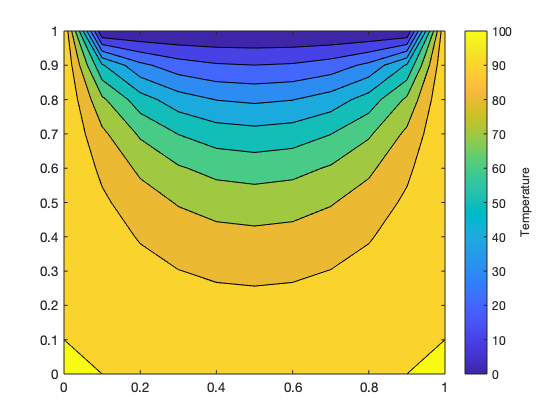

In [25]:
clear; clc; close all

h = 0.1;
x = [0 : h : 1]; n = length(x);
y = [0 : h : 1]; m = length(y);

% The coefficient matrix A is now m*n by m*n, since that is the total number of points.
% The right-hand side vector b is m*n by 1.
A = zeros(m*n, m*n);
b = zeros(m*n, 1);

u_left = 100;
u_right = 100;
u_bottom = 100;
u_top = 0;

for j = 1 : m
    for i = 1 : n
        % for convenience we calculate all the indices once
        kij = (j-1)*n + i;
        kim1j = (j-1)*n + i - 1;
        kip1j = (j-1)*n + i + 1;
        kijm1 = (j-2)*n + i;
        kijp1 = j*n + i;
        
        if i == 1 
            % this is the left boundary
            A(kij, kij) = 1;
            b(kij) = u_left;
        elseif i == n 
            % right boundary
            A(kij, kij) = 1;
            b(kij) = u_right;
        elseif j == 1 
            % bottom boundary
            A(kij, kij) = 1;
            b(kij) = u_bottom;
        elseif j == m 
            % top boundary
            A(kij, kij) = 1;
            b(kij) = u_top;
        else
            % these are the coefficients for the interior points,
            % based on the recursion formula
            A(kij, kim1j) = 1;
            A(kij, kip1j) = 1;
            A(kij, kijm1) = 1;
            A(kij, kijp1) = 1;
            A(kij, kij) = -4;
        end
    end
end
u = A \ b;

u_square = reshape(u, [n, m]);
contourf(x, y, u_square')
c = colorbar;
c.Label.String = 'Temperature';

## Neumann (derivative) boundary conditions

So far, we have only discussed cases where we have Dirichlet boundary conditions; in other words, when we have all fixed values at the boundary. Frequently we also encounter Neumann-style boundary conditions, where we have the *derivative* specified at the boundary.

We can handle this in the same way we do for one-dimensional boundary value problems: either with a forward or backward difference (both of which are first-order accurate), or with a central difference using an imaginary point/ghost node (which is second-order accurate). Let's focus on using the central difference, since it is more accurate.

:::{figure-md} fig-ghost-node
<img src="../../images/2d-ghost-node.png" alt="ghost node at boundary" class="bg-primary mb-1" width="250px">

Ghost/imaginary node beyond an upper boundary
:::

For example, let's say that at the upper boundary, the derivative of temperature is zero:
\begin{equation}
\left. \frac{\partial u}{\partial y} \right|_{\text{boundary}} = 0
\end{equation}

Let's consider this boundary condition applied at the point shown, $u_{2,3}$.
We can approximate this derivative using a central difference:
\begin{align}
\frac{u_{2,3}}{\partial y} \approx \frac{u_{2,4} - u_{2,2}}{\Delta x} &= 0 \\
u_{2,4} &= u_{2,2}
\end{align}
This tells us the value of the point above the boundary, $u_{2,4}$; however, this point is a "ghost" or imaginary point located outside the boundary, so we don't really care about its value. Instead, we can use this relationship to give us a usable equation for the boundary point, by incorporating it into the normal recursion formula for Laplace's equation:
\begin{align}
u_{1,3} + u_{3,3} + u_{2,4} + u_{2,2} - 4u_{2,3} &= 0 \\
u_{1,3} + u_{3,3} + u_{2,2} + u_{2,2} - 4u_{2,3} &= 0 \\
\rightarrow u_{1,3} + u_{3,3} + 2 u_{2,2} - 4u_{2,3} &= 0
\end{align}

The recursion formula for points along the upper boundary would then become
\begin{equation}
u_{i+1,j} + u_{i-1,j} + 2 u_{i,j-1} - 4 u_{i,j} = 0 \;.
\end{equation}

Now let's try solving the above example, but with $\frac{\partial u}{\partial y} = 0$ at the top boundary and $u = 0$ at the bottom boundary:

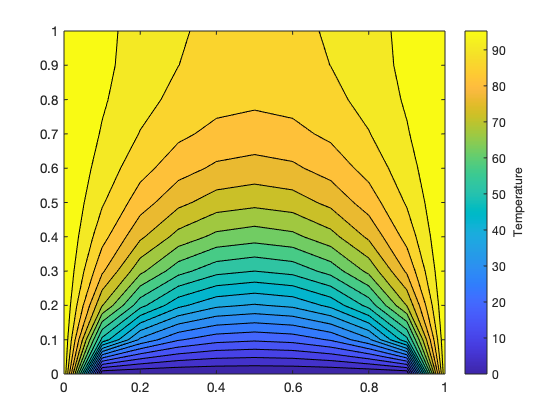

In [30]:
clear; clc; close all

h = 0.1;
x = [0 : h : 1]; n = length(x);
y = [0 : h : 1]; m = length(y);

% The coefficient matrix A is now m*n by m*n, since that is the total number of points.
% The right-hand side vector b is m*n by 1.
A = zeros(m*n, m*n);
b = zeros(m*n, 1);

u_left = 100;
u_right = 100;
u_bottom = 0;

for j = 1 : m
    for i = 1 : n
        % for convenience we calculate all the indices once
        kij = (j-1)*n + i;
        kim1j = (j-1)*n + i - 1;
        kip1j = (j-1)*n + i + 1;
        kijm1 = (j-2)*n + i;
        kijp1 = j*n + i;
        
        if i == 1 
            % this is the left boundary
            A(kij, kij) = 1;
            b(kij) = u_left;
        elseif i == n 
            % right boundary
            A(kij, kij) = 1;
            b(kij) = u_right;
        elseif j == 1 
            % bottom boundary
            A(kij, kij) = 1;
            b(kij) = u_bottom;
        elseif j == m 
            % top boundary, using the ghost node + recursion formula
            A(kij, kim1j) = 1;
            A(kij, kip1j) = 1;
            A(kij, kijm1) = 2;
            A(kij, kij) = -4;
        else
            % these are the coefficients for the interior points,
            % based on the recursion formula
            A(kij, kim1j) = 1;
            A(kij, kip1j) = 1;
            A(kij, kijm1) = 1;
            A(kij, kijp1) = 1;
            A(kij, kij) = -4;
        end
    end
end
u = A \ b;

u_square = reshape(u, [n, m]);
% the "20" indicates the number of levels for the contour plot
contourf(x, y, u_square', 20);
c = colorbar;
c.Label.String = 'Temperature';

## Iterative solutions for (very) large problems

So far, we've been able to solve our systems of linear equations in Matlab by using `y = A \ b`, which directly finds the solution to the equation $A \mathbf{y} = \mathbf{b}$.

However, this approach will become very slow as the grid resolution ($h = \Delta x = \Delta y$) becomes smaller, and eventually unfeasable due to the associated computational requirements. First, let's create a function that takes as input the segment size $h$, then returns the time ittakes to solve the problem for different sizes.

In [34]:
%%file heat_equation.m
function [time, num] = heat_equation(h)

x = [0 : h : 1]; n = length(x);
y = [0 : h : 1]; m = length(y);

% The coefficient matrix A is now m*n by m*n, since that is the total number of points.
% The right-hand side vector b is m*n by 1.
A = zeros(m*n, m*n);
b = zeros(m*n, 1);

num = m*n; % number of points

tic;

u_left = 100;
u_right = 100;
u_bottom = 100;
u_top = 0;

for j = 1 : m
    for i = 1 : n
        % for convenience we calculate all the indices once
        kij = (j-1)*n + i;
        kim1j = (j-1)*n + i - 1;
        kip1j = (j-1)*n + i + 1;
        kijm1 = (j-2)*n + i;
        kijp1 = j*n + i;
        
        if i == 1 
            % this is the left boundary
            A(kij, kij) = 1;
            b(kij) = u_left;
        elseif i == n 
            % right boundary
            A(kij, kij) = 1;
            b(kij) = u_right;
        elseif j == 1 
            % bottom boundary
            A(kij, kij) = 1;
            b(kij) = u_bottom;
        elseif j == m 
            % top boundary
            A(kij, kij) = 1;
            b(kij) = u_top;
        else
            % these are the coefficients for the interior points,
            % based on the recursion formula
            A(kij, kim1j) = 1;
            A(kij, kip1j) = 1;
            A(kij, kijm1) = 1;
            A(kij, kijp1) = 1;
            A(kij, kij) = -4;
        end
    end
end
u = A \ b;

u_square = reshape(u, [n, m]);
% the "20" indicates the number of levels for the contour plot
%contourf(x, y, u_square', 20);
%c = colorbar;
%c.Label.String = 'Temperature';

time = toc;

Created file '/Users/kyle/projects/ME373-book/content/pdes/heat_equation.m'.


Now, we can see how long it takes to solve as we increase the resolution, and get an idea about the relationship between time-to-solution and number of unknowns.



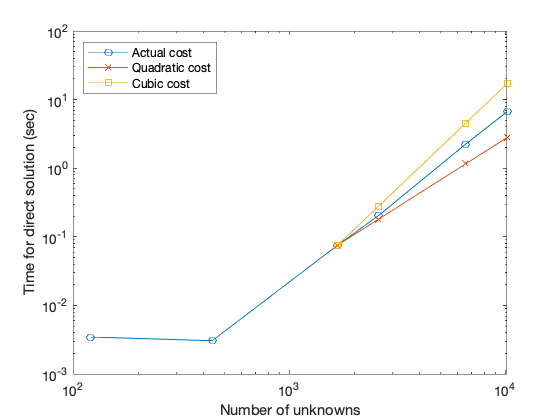

In [47]:
clear all; clc;

step_sizes = [0.1, 0.05, 0.025, 0.02, 0.0125, 0.01];

n = length(step_sizes);
nums = zeros(n,1); times = zeros(n,1);

for i = 1 : n
    [times(i), nums(i)] = heat_equation(step_sizes(i));
end

loglog(nums, times, '-o')
xlabel('Number of unknowns'); 
ylabel('Time for direct solution (sec)')
hold on

x = nums(3:end);
n2 = x.^2 * (times(3) / x(1)^2);
n3 = x.^3 * (times(3) / x(1)^3);
plot(x, n2, '-x');
plot(x, n3, '-s');
legend('Actual cost', 'Quadratic cost', 'Cubic cost', 'Location', 'northwest')

Interestingly, we see that the slope in this log-log plot that after about 400 unknowns (so a coefficient matrix of  about 160,000), the cost begins to increase exponentially, somewhere between quadratic ($\mathcal{O}(n^2)$) and cubic ($\mathcal{O}(n^3)$).

If we try to reduce the step size further, for example to 0.005, we'll see that we cannot get a solution in a reasonable amount of time. But, clearly we want to get solutions for large numbers of unknowns, so what can we do?

We can solve larger systems of linear equations using *iterative* methods. There are a number of these, and we'll focus on two:

- Jacobi method
- Gauss-Seidel method


### Jacobi method

The Jacobi method essentially works by starting with an initial guess to the solution, then using the recursion formula to solve for values at each point, then repeating this until the values converge (i.e., stop changing). 

An algorithm we can use to solve Laplace's equation:

1. Set some initial guess for all unknowns: $u_{i,j}^{\text{old}}$
2. Set the boundary values
3. For each point in the interior, use the recursion formula to solve for new values based on old values at the surrounding points: $u_{i,j} = \left( u_{i+1,j}^{\text{old}} + u_{i-1,j}^{\text{old}} + u_{i,j+1}^{\text{old}} + u_{i,j-1}^{\text{old}} \right)/4$.
4. Check for convergence: is $\epsilon$ less than some tolerance, such as $10^{-6}$? Where $\epsilon = \max \left| u_{i,j} - u_{i,j}^{\text{old}} \right|$. If no, then return to step 2 and repeat.

More formally, if we have a system $A \mathbf{x} = \mathbf{b}$, where
\begin{equation}
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}
\quad \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
\quad \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
\end{equation}
then we can solve iterative for $\mathbf{x}$ using
\begin{equation}
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j \neq i} a_{ij} x_j^{(k)} \right) , \quad i = 1,2,\ldots, n 
\end{equation}
where $x_i^{(k)}$ is a value of the solution at iteration $k$ and $x_i^{(k+1)}$ is at the next iteration.

In [54]:
%%file heat_equation_jacobi.m
function [time, num_point, num_iter] = heat_equation_jacobi(h)

x = [0 : h : 1]; n = length(x);
y = [0 : h : 1]; m = length(y);

% The coefficient matrix A is now m*n by m*n, since that is the total number of points.
% The right-hand side vector b is m*n by 1.
A = zeros(m*n, m*n);
b = zeros(m*n, 1);
num_point = m*n;

tic;

u_left = 100;
u_right = 100;
u_bottom = 100;
u_top = 0;

% initial guess
u = 100*ones(m*n, 1);

% dummy value for residual variable
epsilon = 1.0; 

num_iter = 0;
while epsilon > 1e-6
    u_old = u;
    
    epsilon = 0;
    for j = 1 : m
        for i = 1 : n
            kij = (j-1)*n + i;
            kim1j = (j-1)*n + i - 1;
            kip1j = (j-1)*n + i + 1;
            kijm1 = (j-2)*n + i;
            kijp1 = j*n + i;

            if i == 1 
                % this is the left boundary
                u(kij) = u_left;
            elseif i == n 
                % right boundary
                u(kij) = u_right;
            elseif j == 1 
                % bottom boundary
                u(kij) = u_bottom;
            elseif j == m 
                % top boundary
                u(kij) = u_top;
            else
                % interior points
                u(kij) = (u_old(kip1j) + u_old(kim1j) + u_old(kijm1) + u_old(kijp1))/4.0;
            end
        end
    end
    
    epsilon = max(abs(u - u_old));
    num_iter = num_iter + 1;
end

u_square = reshape(u, [n, m]);
% the "20" indicates the number of levels for the contour plot
contourf(x, y, u_square', 20);
c = colorbar;
c.Label.String = 'Temperature';

time = toc;
fprintf('Number of iterations: %d\n', num_iter)

Created file '/Users/kyle/projects/ME373-book/content/pdes/heat_equation_jacobi.m'.


Number of iterations: 291
Number of iterations: 1061
Number of iterations: 3803
Number of iterations: 5717
Number of iterations: 13421
Number of iterations: 20067
Number of iterations: 69037


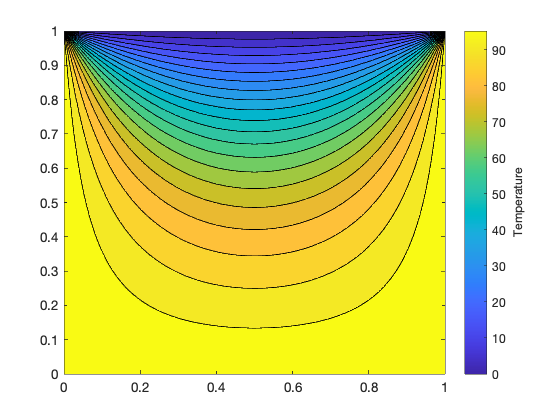

In [55]:
step_sizes = [0.1, 0.05, 0.025, 0.02, 0.0125, 0.01, 0.005];
n = length(step_sizes);

nums_jac = zeros(n,1); times_jac = zeros(n,1); num_iter_jac = zeros(n,1);

for i = 1 : n
    [times_jac(i), nums_jac(i), num_iter_jac(i)] = heat_equation_jacobi(step_sizes(i));
end

### Gauss-Seidel method

The Gauss-Seidel method is very similar to the Jacobi method, but with one important difference: rather than using all old values to calculate the new values, incorporate updated values as they are available. Because the method incorporates newer information more quickly, it tends to converge faster (meaning, with fewer iterations) than the Jacobi method.

Formally, if we have a system $A \mathbf{x} = \mathbf{b}$, where
\begin{equation}
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}
\quad \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
\quad \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
\end{equation}
then we can solve iterative for $\mathbf{x}$ using
\begin{equation}
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j =i+1}^n a_{ij} x_j^{(k)} \right) , \quad i = 1,2,\ldots, n 
\end{equation}
where $x_i^{(k)}$ is a value of the solution at iteration $k$ and $x_i^{(k+1)}$ is at the next iteration.

In [1]:
%%file heat_equation_gaussseidel.m
function [time, num_point, num_iter] = heat_equation_gaussseidel(h)

x = [0 : h : 1]; n = length(x);
y = [0 : h : 1]; m = length(y);

% The coefficient matrix A is now m*n by m*n, since that is the total number of points.
% The right-hand side vector b is m*n by 1.
A = zeros(m*n, m*n);
b = zeros(m*n, 1);
num_point = m*n;

tic;

u_left = 100;
u_right = 100;
u_bottom = 100;
u_top = 0;

% initial guess
u = 100*ones(m*n, 1);

% dummy value for residual variable
epsilon = 1.0; 

num_iter = 0;
while epsilon > 1e-6
    u_old = u;
    
    epsilon = 0;
    for j = 1 : m
        for i = 1 : n
            kij = (j-1)*n + i;
            kim1j = (j-1)*n + i - 1;
            kip1j = (j-1)*n + i + 1;
            kijm1 = (j-2)*n + i;
            kijp1 = j*n + i;

            if i == 1 
                % this is the left boundary
                u(kij) = u_left;
            elseif i == n 
                % right boundary
                u(kij) = u_right;
            elseif j == 1 
                % bottom boundary
                u(kij) = u_bottom;
            elseif j == m 
                % top boundary
                u(kij) = u_top;
            else
                % interior points
                u(kij) = (u(kip1j) + u(kim1j) + u(kijm1) + u(kijp1))/4.0;
            end
        end
    end
    
    epsilon = max(abs(u - u_old));
    num_iter = num_iter + 1;
end

u_square = reshape(u, [n, m]);
%% the "20" indicates the number of levels for the contour plot
contourf(x, y, u_square', 20);
c = colorbar;
c.Label.String = 'Temperature';

time = toc;
fprintf('Number of iterations: %d\n', num_iter)

Created file '/Users/kyle/projects/ME373-book/content/pdes/heat_equation_gaussseidel.m'.


Number of iterations: 156
Number of iterations: 564
Number of iterations: 2025
Number of iterations: 3048
Number of iterations: 7181
Number of iterations: 10762
Number of iterations: 37378


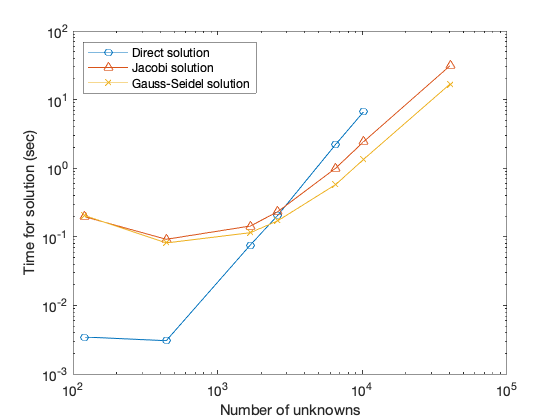

In [58]:
step_sizes = [0.1, 0.05, 0.025, 0.02, 0.0125, 0.01, 0.005];
n = length(step_sizes);

nums_gs = zeros(n,1); times_gs = zeros(n,1); num_iter_gs = zeros(n,1);

for i = 1 : n
    [times_gs(i), nums_gs(i), num_iter_gs(i)] = heat_equation_gaussseidel(step_sizes(i));
end

loglog(nums, times, '-o'); hold on
loglog(nums_jac, times_jac, '-^')
loglog(nums_gs, times_gs, '-x')
xlabel('Number of unknowns'); 
ylabel('Time for solution (sec)')
legend('Direct solution', 'Jacobi solution', 'Gauss-Seidel solution', 'Location', 'northwest')

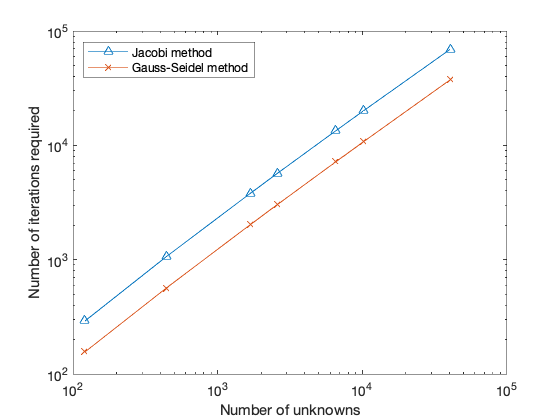

In [60]:
loglog(nums_jac, num_iter_jac, '-^')
hold on;
loglog(nums_gs, num_iter_gs, '-x')
xlabel('Number of unknowns')
ylabel('Number of iterations required')
legend('Jacobi method', 'Gauss-Seidel method', 'Location', 'northwest')

These results show us a few things:

- For very small problems, the direct solution method is faster.
- For the heat equation, once we get to around 1000 unknowns, the methods perform similarly. Beyond this, the direct solution method becomes unreasonably slow, and even fails to solve in a reasonable time for a step size of 0.005.
- The Gauss-Seidel method converges with around half the number of iterations than the Jacobi method.

For larger, more-realistic problems, iterative solution methods like Jacobi and Gauss-Seidel are essential.